In [23]:
# I did this previously in the other notebook
# results_file = 'write/rb.h5ad'  # the file that will store the analysis results
# adata_rb.write(results_file)

In [1]:
import scanpy as sc
adata = sc.read_h5ad("write/rb.h5ad")
adata

AnnData object with n_obs × n_vars = 89927 × 1393
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'patient_id_colors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


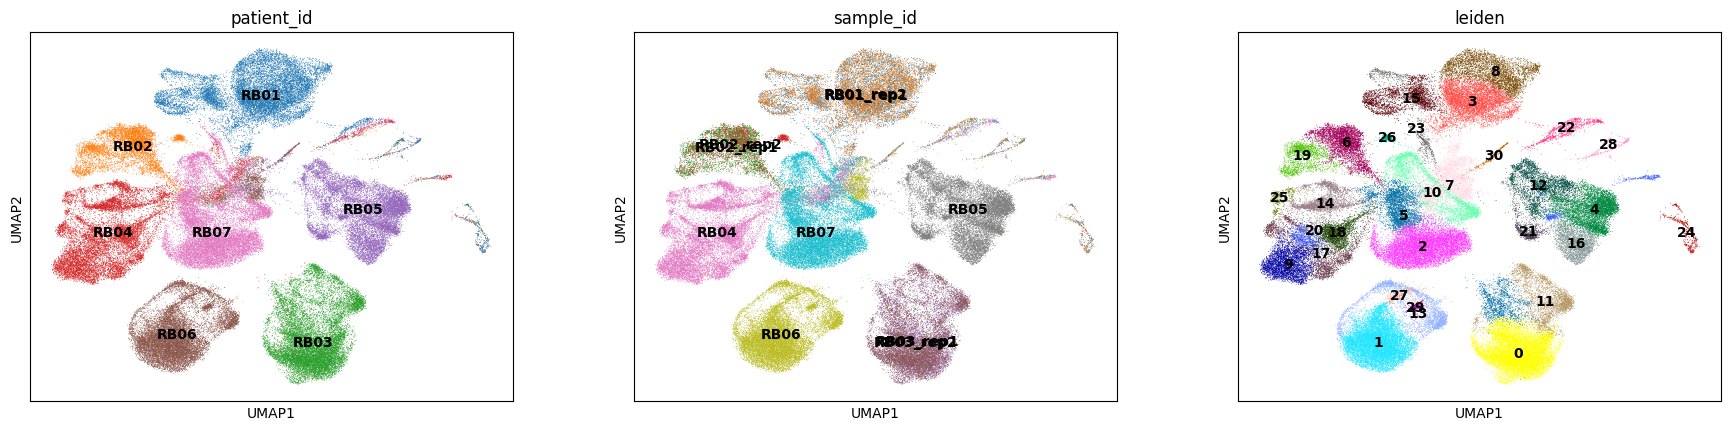

In [2]:
sc.pl.umap(adata, color=['patient_id','sample_id', 'leiden'], legend_loc='on data')

In [3]:
# Kelvin suggest to do batch correction because each patient was its own cluster
sc.external.pp.harmony_integrate(adata, key="sample_id", basis='X_pca', adjusted_basis='X_pca_harmony', )

2023-07-21 20:56:52,396 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
2023-07-21 20:57:46,805 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-21 20:57:47,677 - harmonypy - INFO - Iteration 1 of 10
2023-07-21 20:59:01,649 - harmonypy - INFO - Iteration 2 of 10
2023-07-21 21:00:18,528 - harmonypy - INFO - Converged after 2 iterations


In [4]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40, use_rep="X_pca_harmony")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1086: 

In [5]:
sc.tl.leiden(adata)
sc.tl.umap(adata)

In [6]:
sc.tl.umap(adata)


In [7]:
import scanpy as sc
import pandas as pd
import numpy as np 

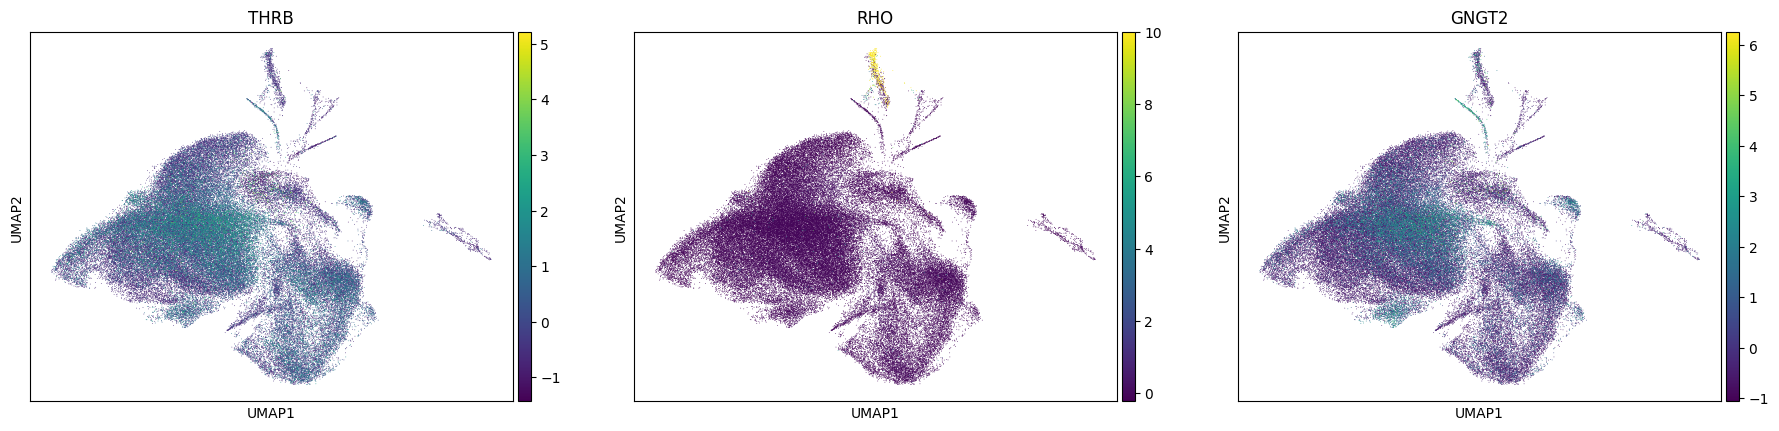

In [8]:
sc.pl.umap(adata, color=['THRB', 'RHO', 'GNGT2'], use_raw=False)
# Not sure whether these are the optimal genes, is there a way to use groups of multiple genes? 
# am I supposed to just put normal retinal gene markers in this part?
# THRB = early cone marker ; RHO = mature rod marker; GNGT2 = mature cone marker 

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


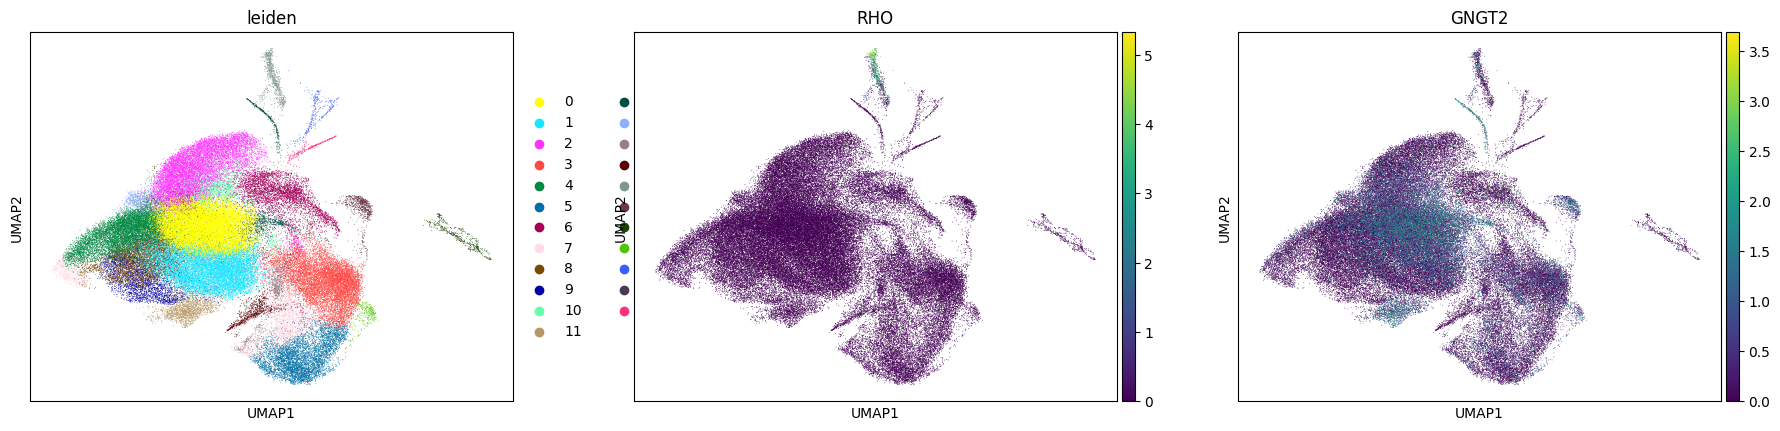

In [10]:
sc.pl.umap(adata, color=['leiden', 'RHO', 'GNGT2'])
#same thing not sure whether these are the optimal genes to do so 

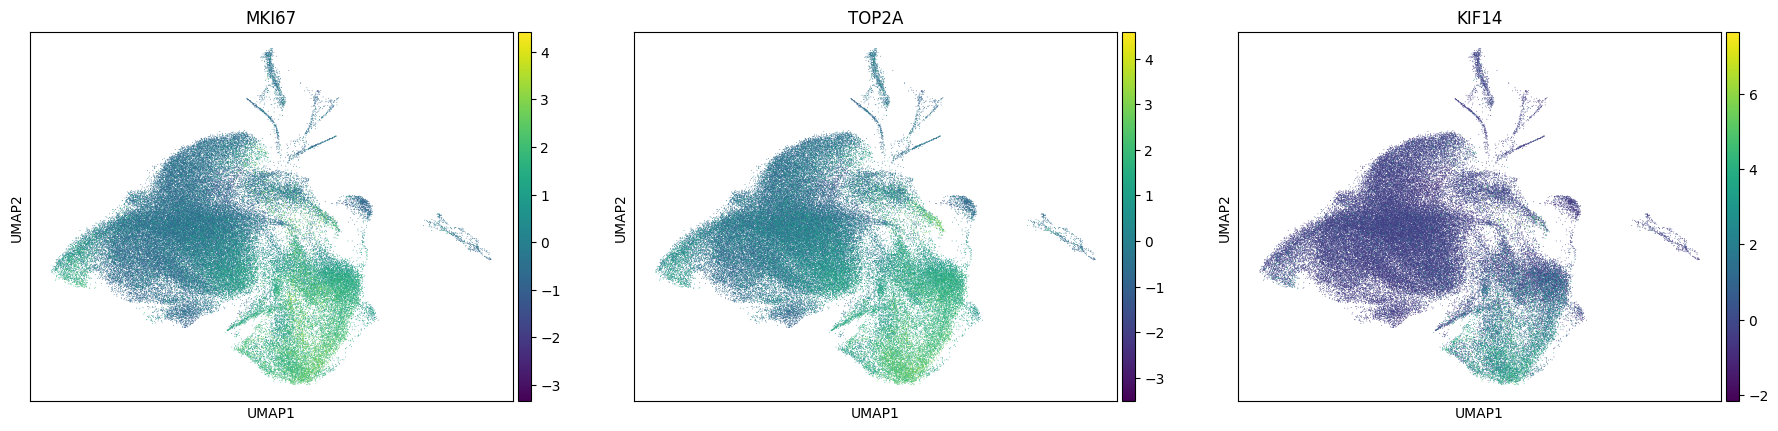

In [11]:
sc.pl.umap(adata, color=['MKI67', 'TOP2A', 'KIF14'], use_raw=False)
#proliferation-related markers - tumour cells??

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


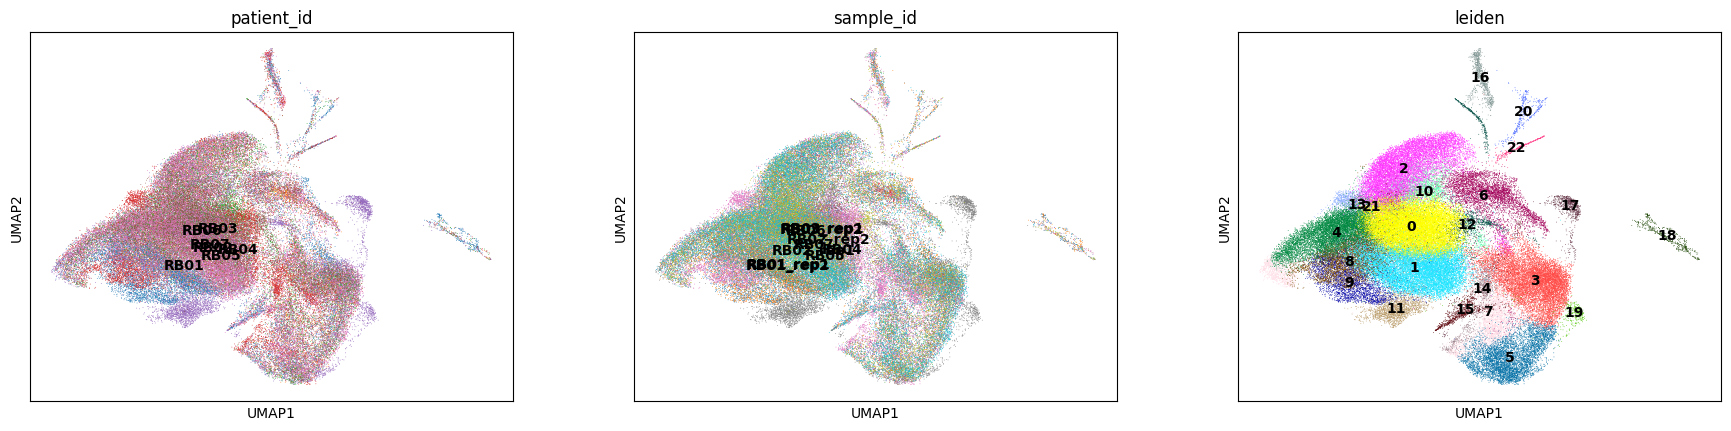

In [12]:
sc.pl.umap(adata, color=['patient_id','sample_id', 'leiden'], legend_loc='on data')

In [17]:
results_file = 'write/harmony.h5ad'

In [18]:
adata.write(results_file)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

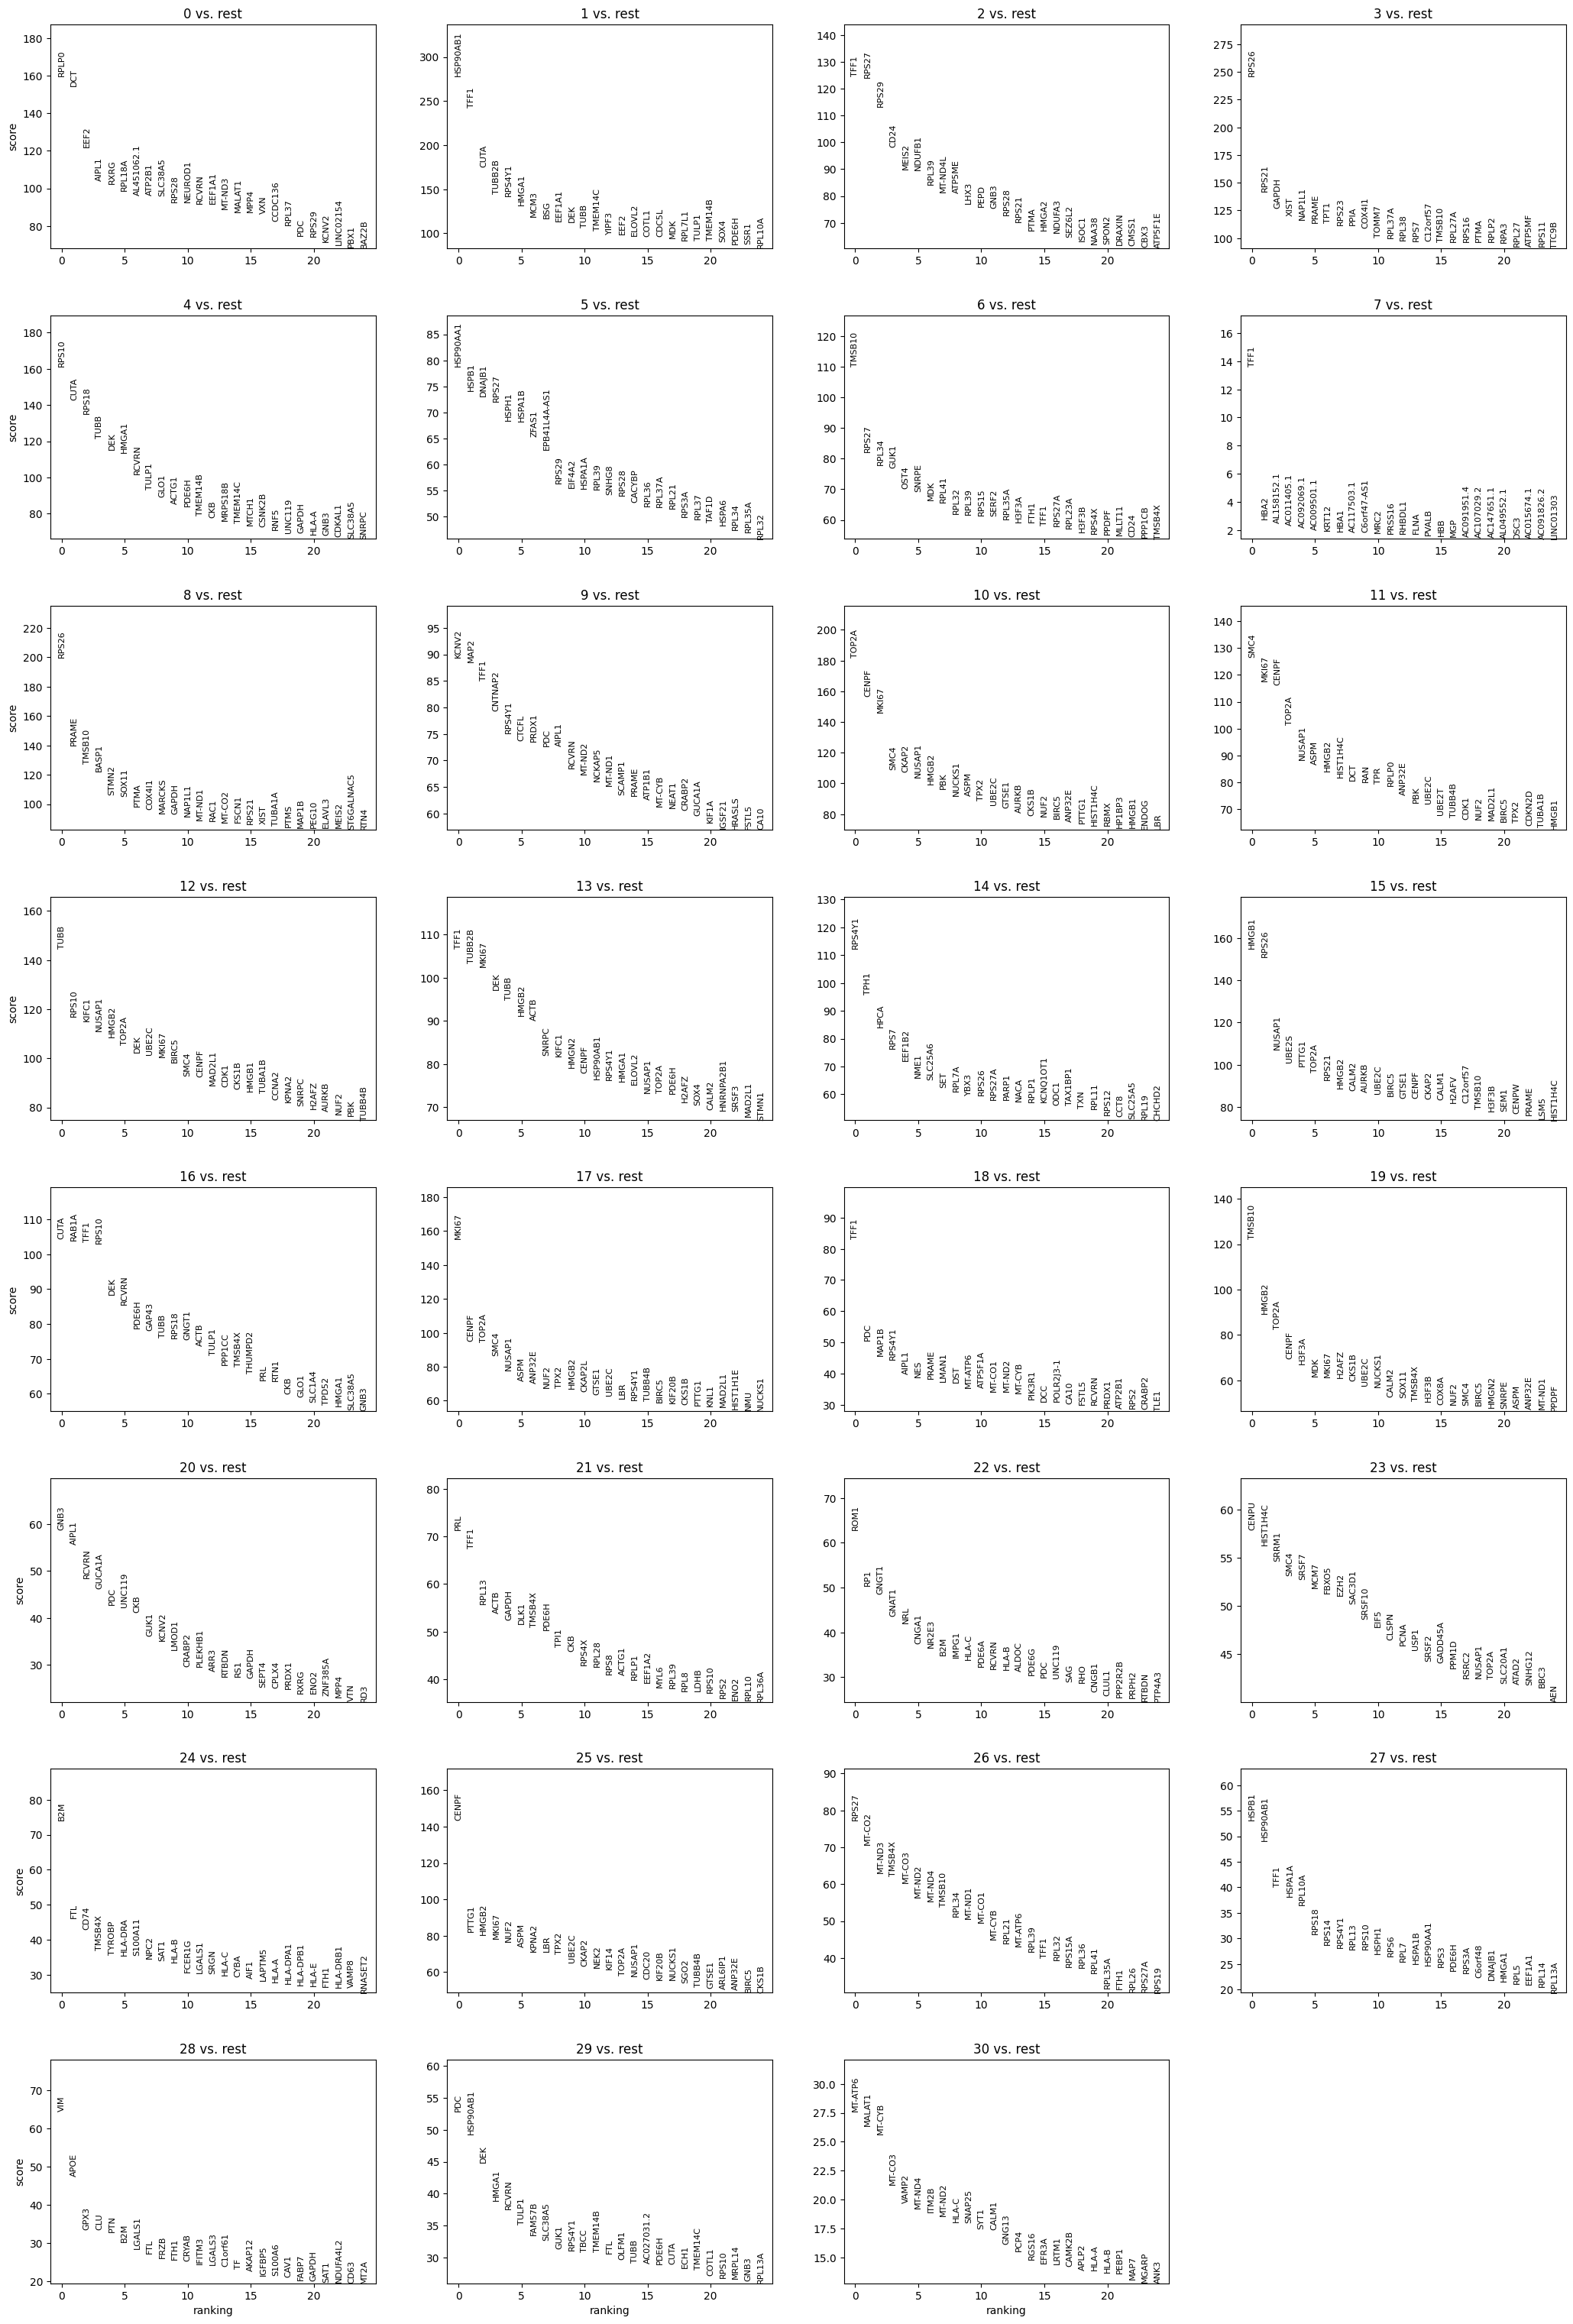

In [56]:
sc.tl.rank_genes_groups(adata_rb , 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_rb , n_genes=25, sharey=False)

ranking genes


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

    finished (0:13:39)


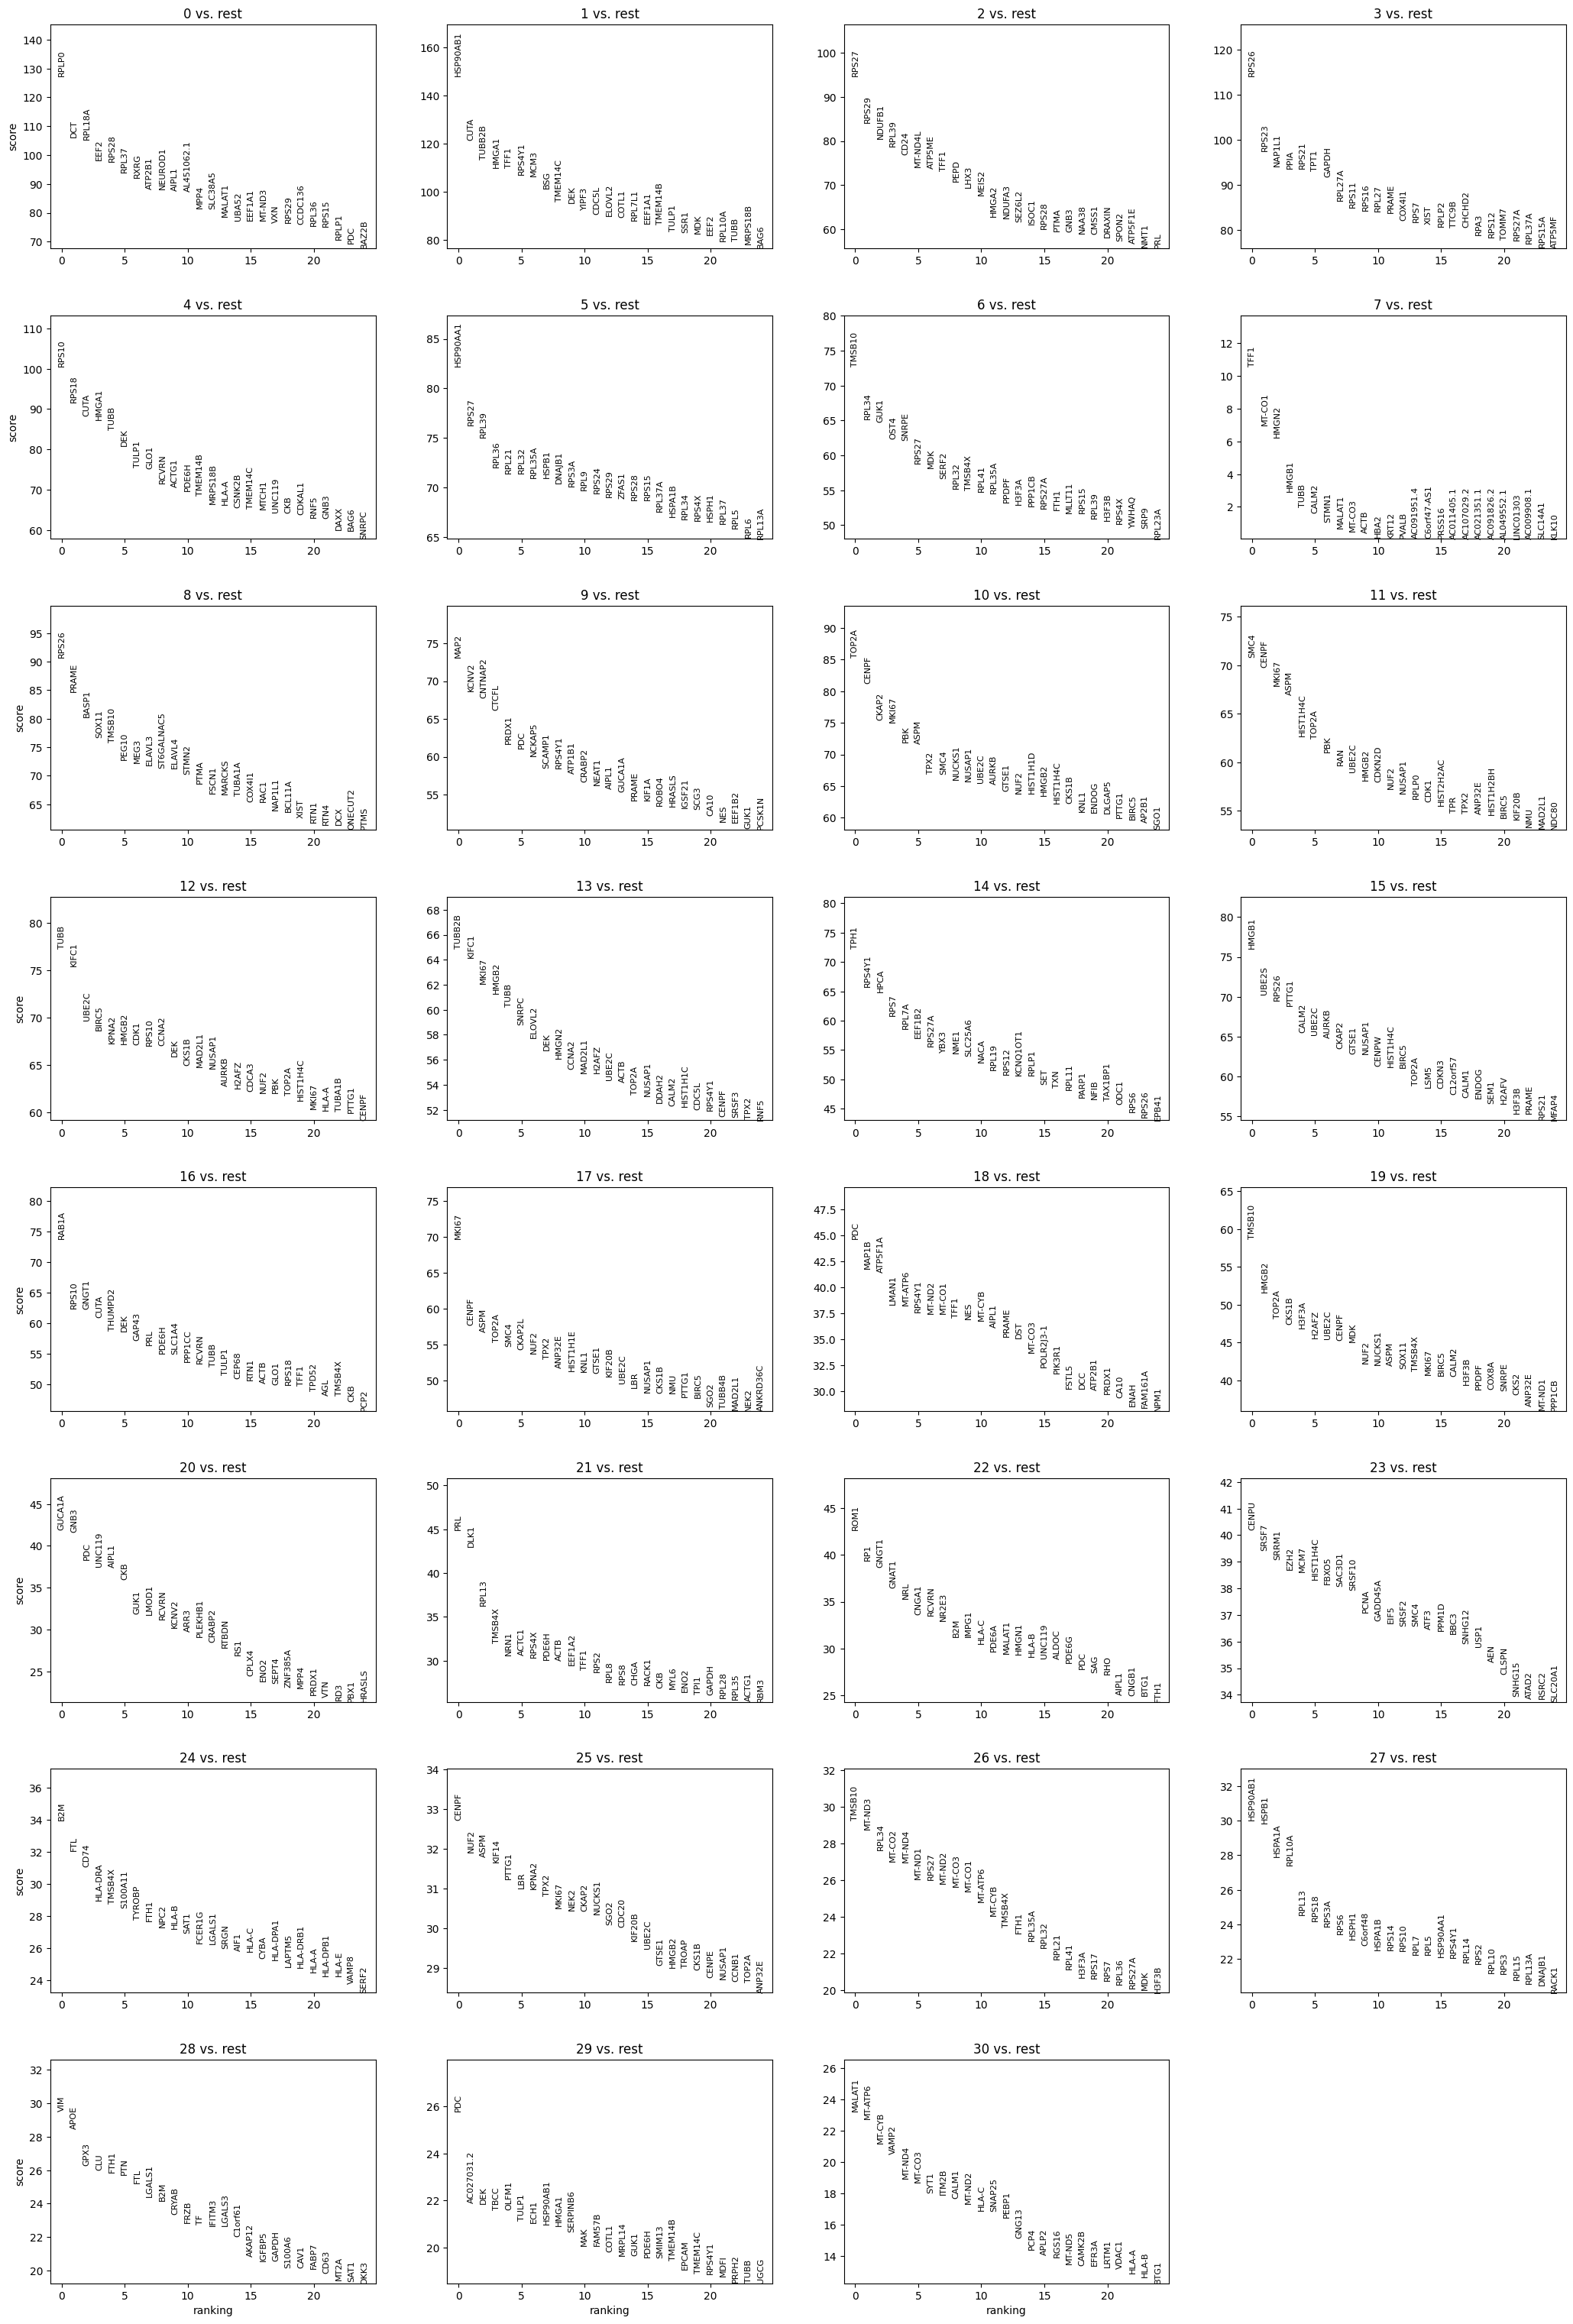

In [61]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata_rb, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_rb, n_genes=25, sharey=False)

In [68]:
adata_rb.write(results_file)


ranking genes


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    finished (0:34:39)


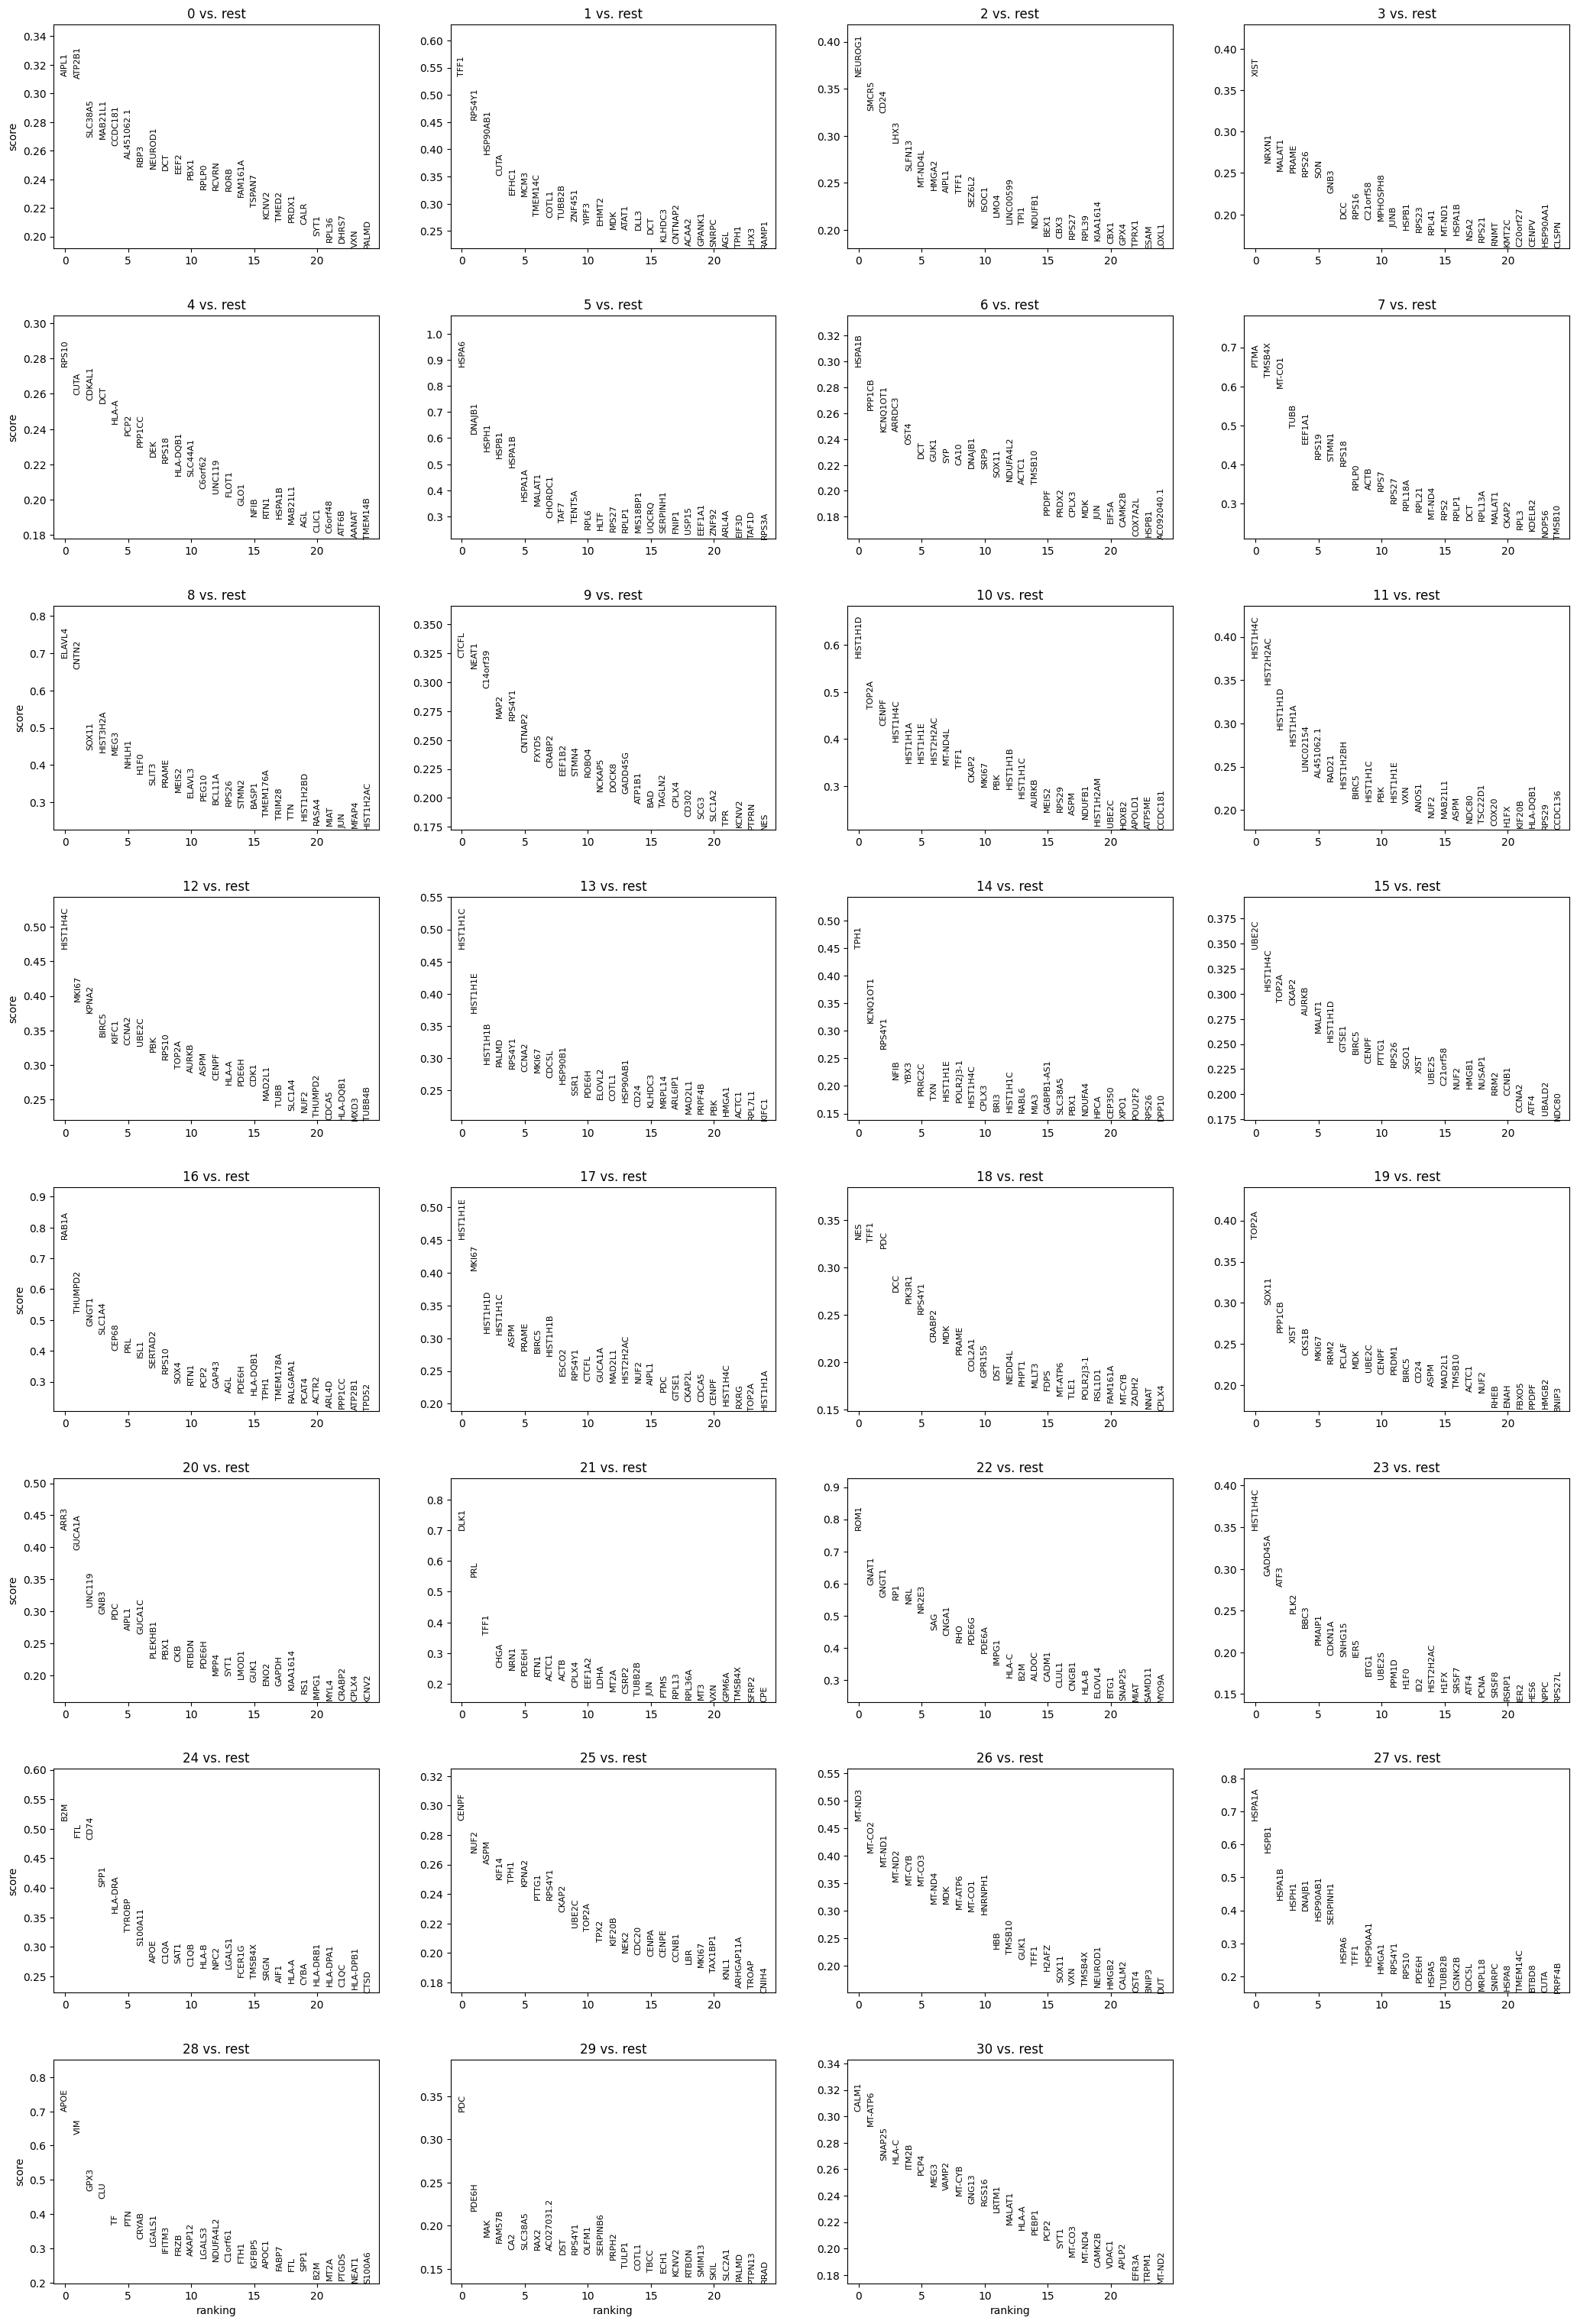

In [69]:
sc.tl.rank_genes_groups(adata_rb, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata_rb, n_genes=25, sharey=False)

In [ ]:
#scanpy tute defines a list of marker_genes 
#marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']
# not sure how to define that - currently researching marker genes related to retina, 
# do i only define markers related to healthy retina?
# this data set also has way more groups than the scanpy tute 

In [70]:
adata_result = sc.read(results_file)

In [66]:
print (adata_result)

AnnData object with n_obs × n_vars = 47323 × 1324
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [67]:
pd.DataFrame(adata_result.uns['rank_genes_groups']['names']).head(5)


0         1      2      3       4      5       6       7       8  \
0   RPLP0  HSP90AB1  RPS27  RPS26  TMSB10  RPS10  RPS4Y1   HMGB1   RPS27   
1  RPL18A      CUTA   PEPD  PRAME    GUK1  RPS18     PDC  TUBA1B   RPL39   
2   RPS28      TFF1  MEIS2   TPT1  TMSB4X   TUBB   PRAME    PTMA   RPS29   
3   RPL37    TUBB2B   LHX3  RPS23    OST4  HMGA1   CTCFL   HMGN2  RPS15A   
4     DCT       BSG   CD24  GAPDH   H3F3A   CUTA   AIPL1   STMN1   RPL41   

          9  ...      19       20     21        22     23       24      25  \
0  HSP90AA1  ...   MKI67  ARL6IP1  UBE2S  HIST1H4C  MKI67      B2M     PRL   
1    HSPA1B  ...   TOP2A     ACTB  RPS26      RRM2   TUBB      FTL    DLK1   
2    HSPA1A  ...   CENPF  HSP90B1  PTTG1      EZH2  KIFC1     CD74  TMSB4X   
3    DNAJB1  ...    SMC4    PTTG1   PTMS     FBXO5  TOP2A   TMSB4X    TFF1   
4     HSPB1  ...  NUSAP1    CCNB2  HMGB1   GADD45A  CENPF  S100A11   RPL13   

       26    27       28  
0  TMSB10   VIM   MALAT1  
1  MT-ND3  APOE    VAMP2  
2  MT-CO2  GPX3  MT-ATP6  
3  MT-ND4   FTL   SNAP25  
4   RPL34  FTH1   MT-CYB  

[5 rows x 29 columns]

In [68]:
result = adata_result.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n  0_p       1_n  1_p    2_n  2_p    3_n  3_p     4_n  4_p  ...  \
0   RPLP0  0.0  HSP90AB1  0.0  RPS27  0.0  RPS26  0.0  TMSB10  0.0  ...   
1  RPL18A  0.0      CUTA  0.0   PEPD  0.0  PRAME  0.0    GUK1  0.0  ...   
2   RPS28  0.0      TFF1  0.0  MEIS2  0.0   TPT1  0.0  TMSB4X  0.0  ...   
3   RPL37  0.0    TUBB2B  0.0   LHX3  0.0  RPS23  0.0    OST4  0.0  ...   
4     DCT  0.0       BSG  0.0   CD24  0.0  GAPDH  0.0   H3F3A  0.0  ...   

      24_n           24_p    25_n           25_p    26_n          26_p  27_n  \
0      B2M  4.939844e-193     PRL  9.061571e-111  TMSB10  1.439299e-95   VIM   
1      FTL  5.774580e-162    DLK1   8.846523e-84  MT-ND3  5.297752e-88  APOE   
2     CD74  4.843466e-149  TMSB4X   6.775911e-63  MT-CO2  7.214119e-83  GPX3   
3   TMSB4X  2.445008e-137    TFF1   1.013082e-58  MT-ND4  1.227055e-78   FTL   
4  S100A11  7.720978e-128   RPL13   4.475860e-58   RPL34  5.569686e-77  FTH1   

           27_p     28_n          28_p  
0  4.792883e-94   MALAT1  6.618528e-60  
1  2.139265e-89    VAMP2  3.851025e-54  
2  1.994029e-74  MT-ATP6  3.914671e-51  
3  8.031818e-71   SNAP25  3.045740e-45  
4  3.545938e-69   MT-CYB  4.266256e-43  

[5 rows x 58 columns]

In [70]:
adata_result.uns['log1p']["base"] = None 
#googled how to fix key error 'base' for sc.tl.rank_genes_groups command

ranking genes
    finished (0:01:46)


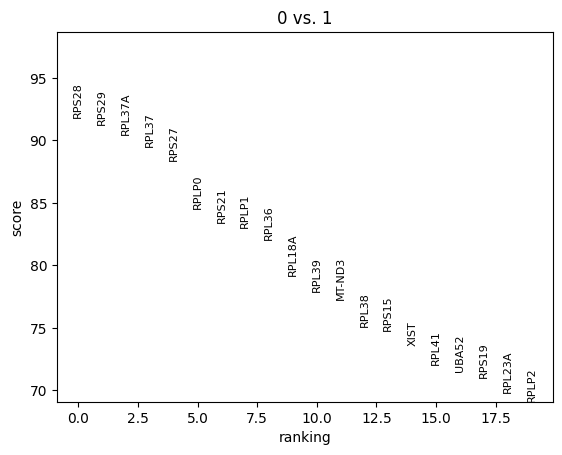

In [71]:
sc.tl.rank_genes_groups(adata_result, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata_result, groups=['0'], n_genes=20)
#key error 'base' came up the first time this was run 

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


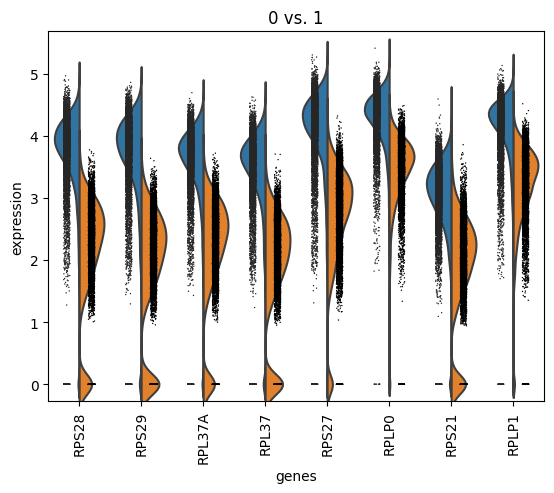

In [72]:
sc.pl.rank_genes_groups_violin(adata_result, groups='0', n_genes=8)


In [73]:
adata = sc.read(results_file)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


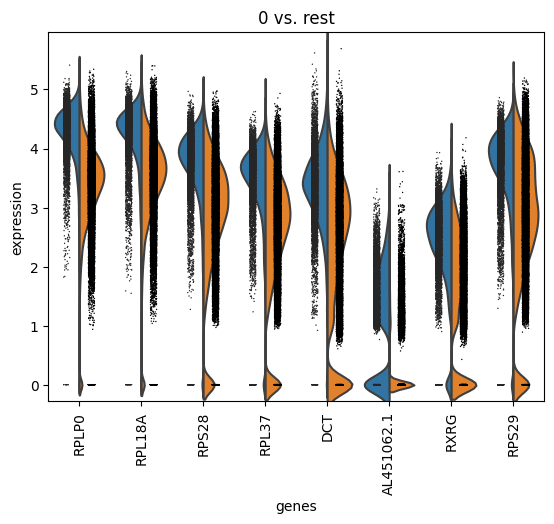

In [74]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)


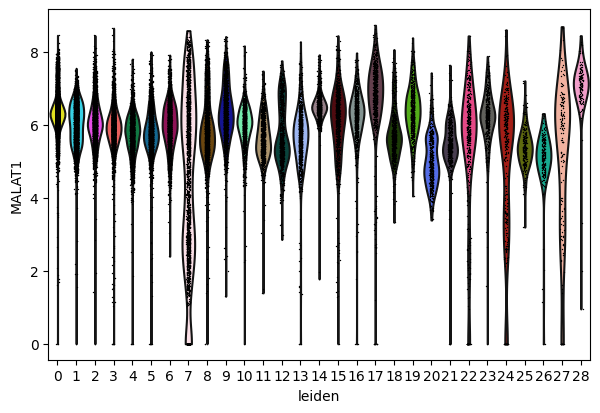

In [75]:
sc.pl.violin(adata, ['MALAT1'], groupby='leiden')
#command on scanpy tute: sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')
#not sure what to put for the comparison gene 

In [ ]:
#again, currently working on identifying key cell types from research, 
#do i just cluster according to healthy markers?
#new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
#adata.rename_categories('leiden', new_cluster_names)

In [78]:
#sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')


In [ ]:
#sc.pl.dotplot(adata, marker_genes, groupby='leiden');


In [ ]:
#sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);


In [ ]:
#adata
#adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading


In [ ]:
#adata.raw.to_adata().write('./write/rb_withoutX.h5ad')
